<a href="https://colab.research.google.com/github/RanjaniGanesh/Energy-efficiency/blob/main/Energy_efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the necessary packages**

In [1]:
#import necessary libraries
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# **Data exploration**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data =pd.DataFrame(pd.read_excel("/content/drive/MyDrive/ENB2012_data.xlsx"))

In [4]:
#Read the dataset
def read_excel(filepath):
  data = pd.read_excel(filepath)
  return data

In [5]:
#Check for null values
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [6]:
#Check for duplicated values
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


It seems that the dataset contain no null values and no duplicate values. i.e the given data is a cleaned data

**Data cleaning**

In [8]:
#clean the data
def data_clean(clean):
  df =read_excel(clean)
  df.dropna()
  df_cols =['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation',
           'Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load']
  df.columns =df_cols
  return df



In [9]:
data_clean("/content/drive/MyDrive/ENB2012_data.xlsx")

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


**Glimpse of the data**

In [10]:
#description of data
data_clean("/content/drive/MyDrive/ENB2012_data.xlsx").describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


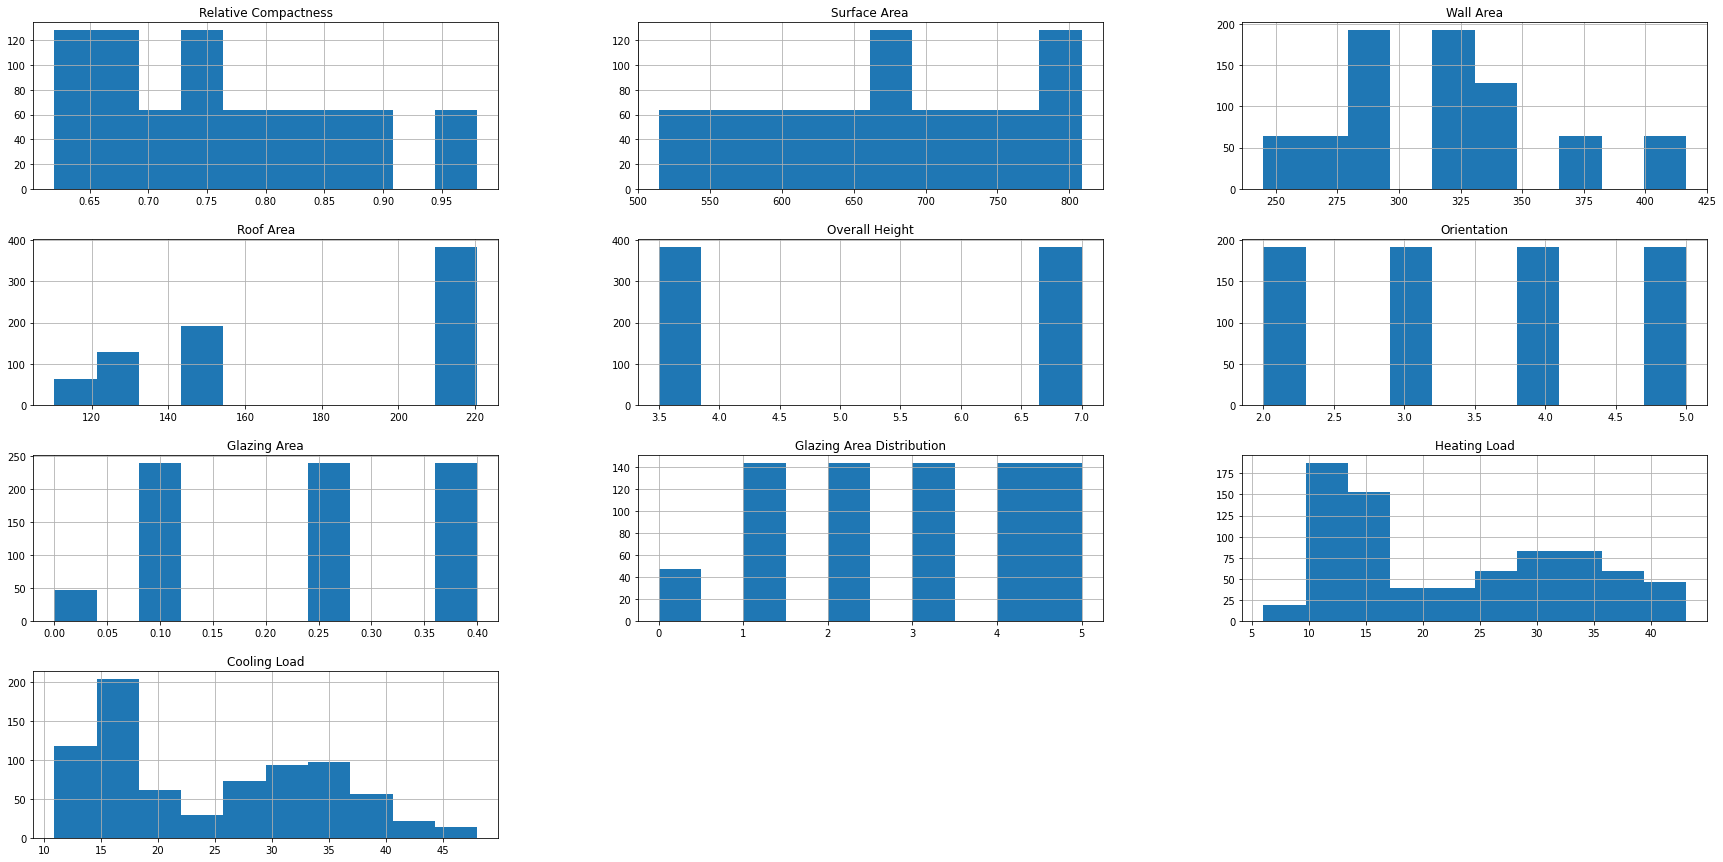

In [11]:
data_clean("/content/drive/MyDrive/ENB2012_data.xlsx").hist(figsize=(30,15))
plt.show()

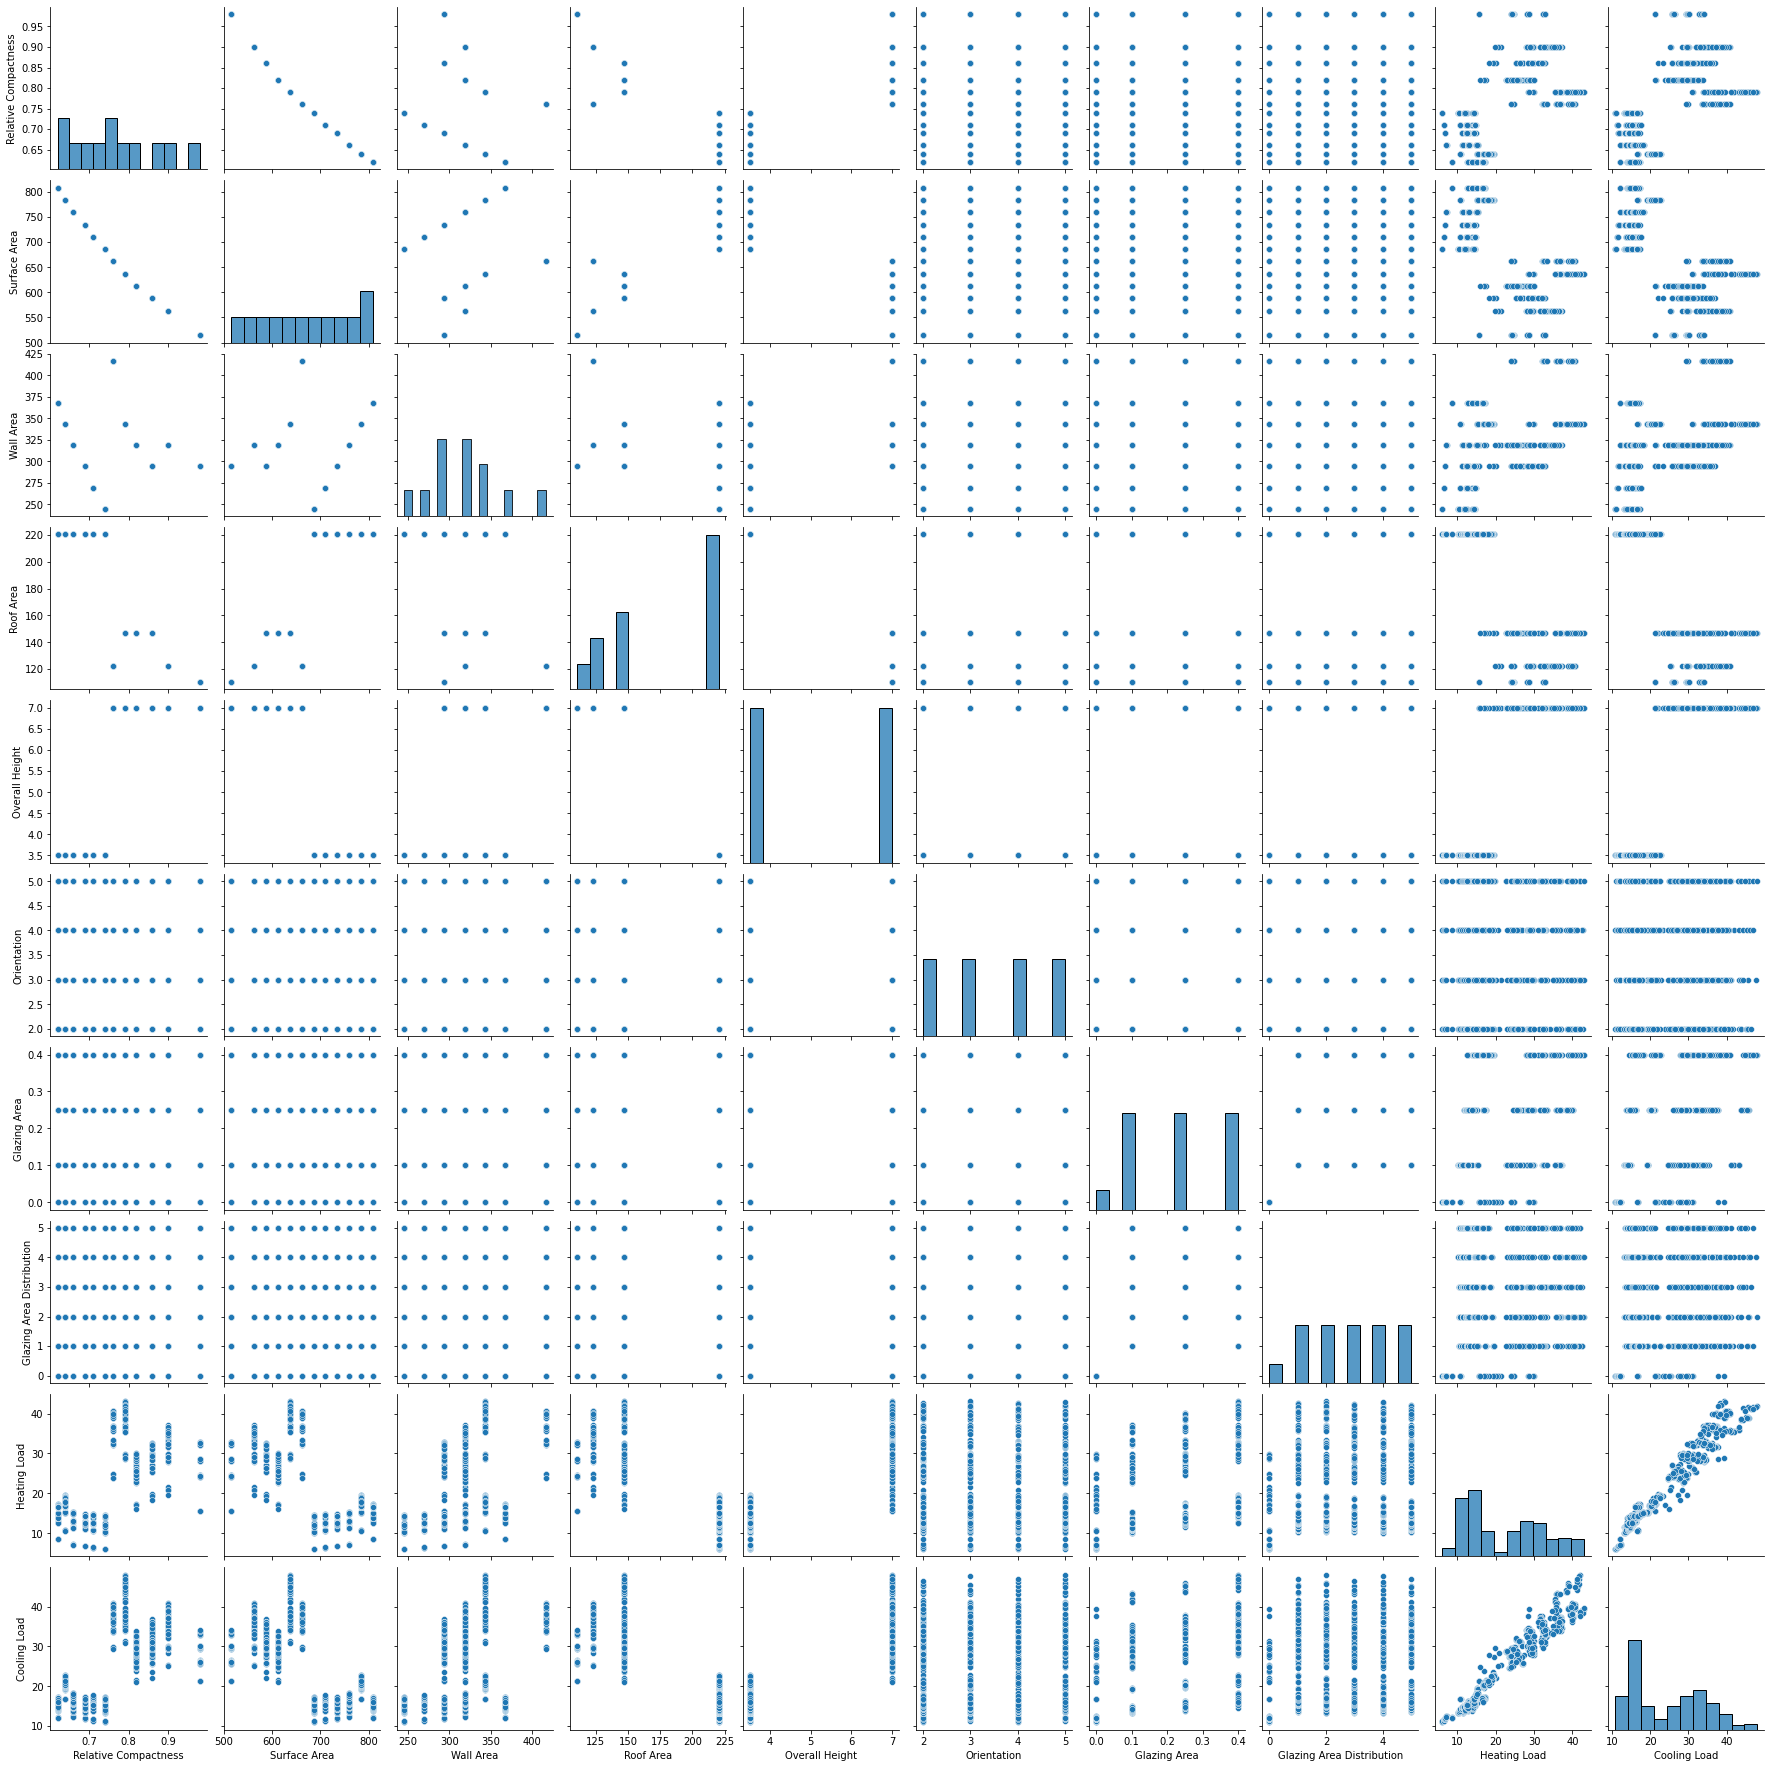

In [12]:
sns.pairplot(data_clean("/content/drive/MyDrive/ENB2012_data.xlsx"))
plt.show()

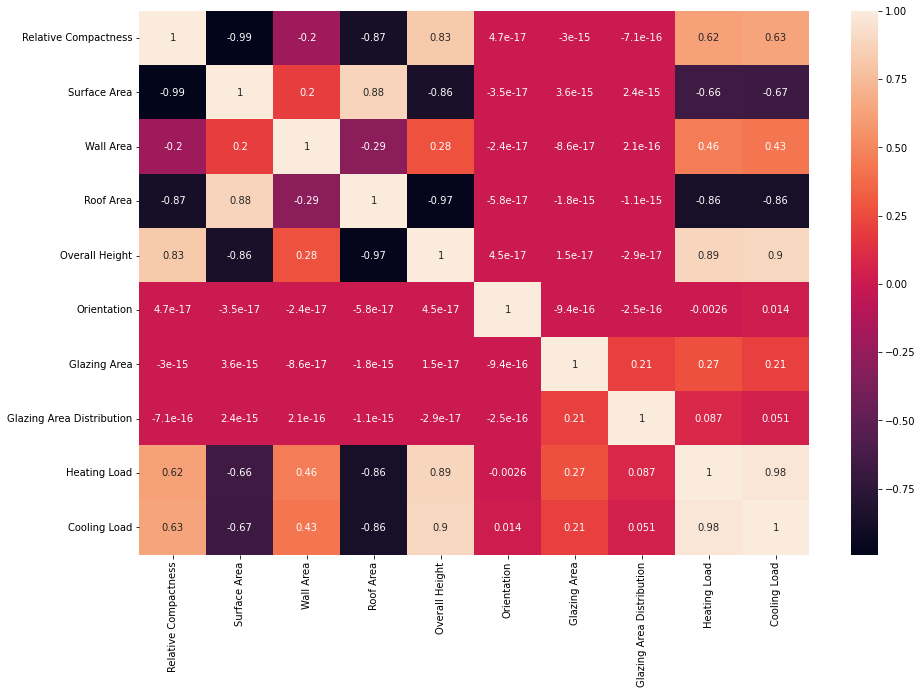

In [13]:
correlation =data_clean("/content/drive/MyDrive/ENB2012_data.xlsx").corr()
plt.figure(figsize =(15,10))
sns.heatmap(correlation,annot =True)

# **Data splitting**

In [14]:
#Splitting the data into features and target
def splitting(v):
  split =data_clean(v)
  X =split.iloc[:,:-2]
  Y =split.iloc[:,-2:]
  return {"Features":X,"Target":Y}

In [15]:
s =splitting("/content/drive/MyDrive/ENB2012_data.xlsx")
s["Features"]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [16]:
s["Target"]

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


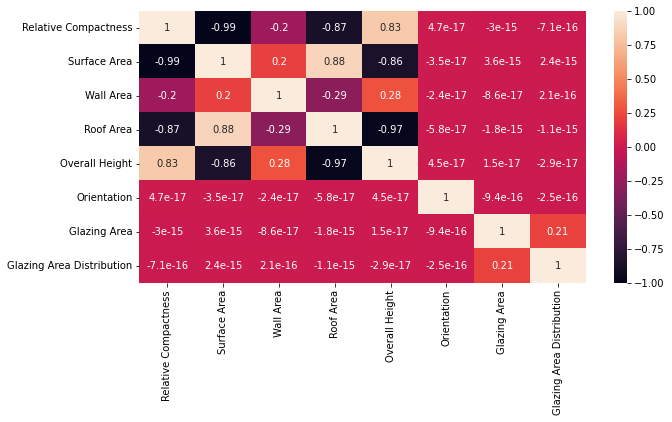

In [17]:
#View the correlation among the features
corr =s["Features"].corr()
plt.figure(figsize =(10,5))
sns.heatmap(corr,vmin =-1, vmax=1,annot =True)
plt.show()

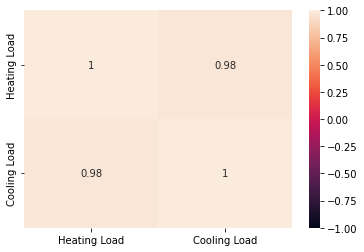

In [18]:
#View the correlation among the target
corr =s["Target"].corr()
sns.heatmap(corr,vmin =-1, vmax=1,annot =True)
plt.show()

**Splitting the data for training and testing**

In [19]:
#Train the data 
def train_test(s):
  train_test_splitting =splitting(s)
  X_train,X_test,y_train,y_test= train_test_split(train_test_splitting["Features"],train_test_splitting["Target"],  test_size= 0.33,random_state =0)
  return {"X_Train":X_train,"X_Test":X_test,"Y_Train":y_train,"Y_Test":y_test}


In [20]:
v =train_test("/content/drive/MyDrive/ENB2012_data.xlsx")
v["X_Train"]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
613,0.66,759.5,318.5,220.50,3.5,3,0.40,2
159,0.82,612.5,318.5,147.00,7.0,5,0.10,3
711,0.66,759.5,318.5,220.50,3.5,5,0.40,4
745,0.74,686.0,245.0,220.50,3.5,3,0.40,5
447,0.82,612.5,318.5,147.00,7.0,5,0.25,4
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.40,5
192,0.98,514.5,294.0,110.25,7.0,2,0.10,4
629,0.90,563.5,318.5,122.50,7.0,3,0.40,3
559,0.71,710.5,269.5,220.50,3.5,5,0.40,1


# **Feature scaling**

In [21]:
#To standardise and normalise the features values in a fixed range
def feature_scaling(features):
  feat =train_test(features)
  #Initialize minmax scaler
  min_max_scaler =preprocessing.MinMaxScaler()
  X_after_min_max_scaler =min_max_scaler.fit_transform(feat['X_Train'])
  # Initialize standard scaler
  standardize =preprocessing.StandardScaler()
  X_after_standardise=standardize.fit_transform(feat['X_Train'])
  return({"X_std": X_after_standardise,"X_norm":X_after_min_max_scaler,"std":standardize,"normalize":min_max_scaler})
v =feature_scaling("/content/drive/MyDrive/ENB2012_data.xlsx")
v["X_norm"]


array([[0.11111111, 0.83333333, 0.42857143, ..., 0.33333333, 1.        ,
        0.4       ],
       [0.55555556, 0.33333333, 0.42857143, ..., 1.        , 0.25      ,
        0.6       ],
       [0.11111111, 0.83333333, 0.42857143, ..., 1.        , 1.        ,
        0.8       ],
       ...,
       [0.77777778, 0.16666667, 0.42857143, ..., 0.33333333, 1.        ,
        0.6       ],
       [0.25      , 0.66666667, 0.14285714, ..., 1.        , 1.        ,
        0.2       ],
       [0.55555556, 0.33333333, 0.42857143, ..., 0.        , 1.        ,
        0.8       ]])

# **Model fitting**

In [22]:
#Model fitting
def model_fitting(v):
  model_fit =train_test(v)
  scaled =feature_scaling(v)
  #Initialising Multioutput regressor model
  regr_multi_rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,max_depth=30,random_state=0))
  multi_rf_std =regr_multi_rf.fit(scaled["X_std"],model_fit["Y_Train"])
  multi_rf_norm =regr_multi_rf.fit(scaled["X_norm"],model_fit["Y_Train"])
  #Initialising Random forest regressor
  regr_rf = RandomForestRegressor(n_estimators=100, max_depth=15,random_state=2)
  reg_std =regr_rf.fit(scaled["X_std"],model_fit["Y_Train"])
  reg_norm =regr_rf.fit(scaled["X_norm"],model_fit["Y_Train"])
  return  {"multi_RFR_std":multi_rf_std, "multi_RFR_norm":multi_rf_norm, "regr_std":reg_std,"regr_norm":reg_norm}

In [23]:
v =model_fitting("/content/drive/MyDrive/ENB2012_data.xlsx")
v["multi_RFR_std"]

MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=30,
                                                     random_state=0))

In [24]:
v["regr_std"]

RandomForestRegressor(max_depth=15, random_state=2)

**Model prediction**

In [25]:
#Predict the model
def predict(x):
  pred =model_fitting(x)
  scale =feature_scaling(x)
  splited =train_test(x)
  std1 =scale["std"].transform(splited["X_Test"])
  norm1 =scale["normalize"].transform(splited["X_Test"])
  multi_rf_std =pred["multi_RFR_std"].predict(std1)
  multi_rf_norm =pred["multi_RFR_norm"].predict(norm1)
  rf_std =pred["regr_std"].predict(std1)
  rf_norm =pred["regr_norm"].predict(norm1)
  return {"multi_std":multi_rf_std ,"multi_norm":multi_rf_norm, "rfr_std":rf_std ,"rfr_norm":rf_norm}

In [26]:
v =predict("/content/drive/MyDrive/ENB2012_data.xlsx")
v["multi_std"]

array([[17.1005 , 18.1169 ],
       [11.44086, 15.4169 ],
       [16.4199 , 27.8371 ],
       [17.9302 , 22.5236 ],
       [31.6028 , 33.279  ],
       [16.5467 , 22.9989 ],
       [17.245  , 22.4622 ],
       [30.6291 , 31.1303 ],
       [20.2416 , 24.3    ],
       [20.9489 , 25.8541 ],
       [11.67696, 15.779  ],
       [27.9094 , 34.5367 ],
       [10.32712, 13.7211 ],
       [27.8342 , 35.7097 ],
       [27.6681 , 34.2358 ],
       [20.4197 , 24.7787 ],
       [13.9239 , 16.7529 ],
       [16.5467 , 22.9989 ],
       [10.4027 , 12.9589 ],
       [11.86896, 15.5256 ],
       [ 9.81588, 14.0824 ],
       [31.6028 , 33.279  ],
       [14.14716, 16.5398 ],
       [16.4199 , 27.8371 ],
       [11.15486, 15.7273 ],
       [20.4855 , 21.5198 ],
       [10.4027 , 12.9589 ],
       [20.1855 , 20.7435 ],
       [11.67696, 15.779  ],
       [19.0093 , 28.2773 ],
       [10.3609 , 13.0214 ],
       [10.38472, 13.7833 ],
       [28.3307 , 35.7272 ],
       [ 8.45962, 12.8611 ],
       [20.550

**Model validation**

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error as mae
from numpy import absolute

In [28]:
def cross_valid(x):
  cross =predict(x)
  model =model_fitting(x)
  scale =feature_scaling(x)
  splited =train_test(x)
  cleaned =splitting(x)
  cross_validation = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores_multi = cross_val_score(model['multi_RFR_std'], splited['X_Train'],splited['Y_Train'], scoring='neg_mean_squared_error', cv=cross_validation, n_jobs=-1)
  scores_rfr = cross_val_score(model['regr_std'], splited['X_Train'],splited['Y_Train'], scoring='neg_mean_squared_error', cv=cross_validation, n_jobs=-1)
  n_scores = absolute(scores_multi)
  m_scores =absolute(scores_rfr)
  return{"multi_score":n_scores, "rfr_score":m_scores}


In [29]:
v =cross_valid("/content/drive/MyDrive/ENB2012_data.xlsx")
v["multi_score"]

array([1.63573698, 1.33195697, 1.83181719, 1.11927746, 1.87020792,
       1.51153667, 1.30276723, 1.31502912, 2.05582367, 1.53781564,
       1.91118979, 2.59483476, 1.53491632, 0.85468745, 1.51639342,
       1.05592396, 2.21074673, 0.72190911, 1.62553076, 1.41973041,
       2.09794076, 1.57203426, 2.18648745, 1.41413337, 1.85260772,
       1.20944024, 1.59313346, 1.79476733, 2.02793458, 1.5771041 ])

In [30]:
v["rfr_score"]

array([1.83453162, 1.8117377 , 2.120117  , 1.23589739, 2.54058862,
       1.63150581, 1.52560945, 2.05805137, 2.60277997, 1.66199059,
       2.34665947, 2.88073756, 1.66572346, 1.30309344, 1.90614962,
       1.54748928, 2.37984094, 0.78501244, 2.09835865, 1.5981267 ,
       2.52761163, 1.65643423, 2.31493903, 1.93899218, 1.84844198,
       1.29442581, 2.07656047, 2.21881537, 2.44533388, 1.99089488])

# **Model evaluation**

In [31]:
from sklearn.metrics import mean_absolute_error as mae
#Evaluate the model
def evaluations(x):
  eval =predict(x)
  test =train_test(x)
  mae_multi_std =mae(test["Y_Test"],eval["multi_std"])
  mae_multi_norm =mae(test["Y_Test"],eval["multi_norm"])
  mae_rfr_std =mae(test["Y_Test"],eval["rfr_std"])
  mae_rfr_norm =mae(test["Y_Test"],eval["rfr_norm"])
  return {"MAE1":mae_multi_std,"MAE2":mae_multi_norm,"MAE3":mae_rfr_std,"MAE4":mae_rfr_norm}

In [32]:
v =evaluations("/content/drive/MyDrive/ENB2012_data.xlsx")
v["MAE1"]

4.812523464566931

In [33]:
v["MAE2"]

0.7187854724409442

In [34]:
v["MAE3"]

5.357911496062998

In [35]:
v["MAE4"]

0.7394542913385832